In [1]:
# Imports
import vtk, vtkplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load in VTK and MATLAB images as VTK image data
reader1 = vtk.vtkTIFFReader()
reader1.SetFileName("./Data/wrist_vol_test_render.tif")
reader1.Update()
vtkImg = reader1.GetOutput()

reader2 = vtk.vtkTIFFReader()
reader2.SetFileName("./Data/taskID_01_cam01.tif")
reader2.Update()
matlabImg = reader2.GetOutput()

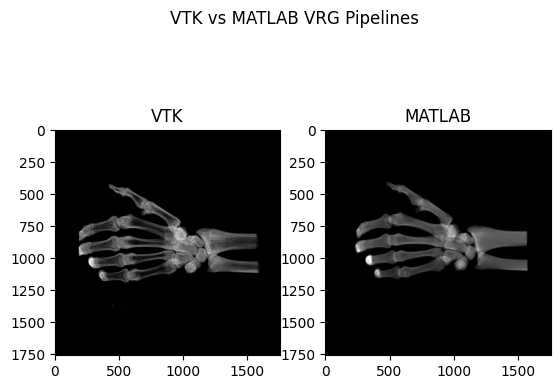

In [3]:
# Display the images side by side
vtkNPImg = vtkplotlib.image_io.vtkimagedata_to_array(vtkImg)
matlabNPImg = vtkplotlib.image_io.vtkimagedata_to_array(matlabImg)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('VTK vs MATLAB VRG Pipelines')
ax1.imshow(vtkNPImg,cmap='Greys')
ax1.set_title('VTK')
ax2.imshow(matlabNPImg,cmap='Greys')
ax2.set_title('MATLAB')
plt.savefig("./Data/vtkVMatlabGreyImgs.png")

In [4]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('VTK vs MATLAB Histograms')
# ax1.hist(vtkNPImg.ravel())
# ax1.set_title('VTK')
# ax1.set_xlim(0,256)
# ax2.hist(matlabNPImg.ravel())
# ax2.set_title('MATLAB')
# ax2.set_xlim(0,256)

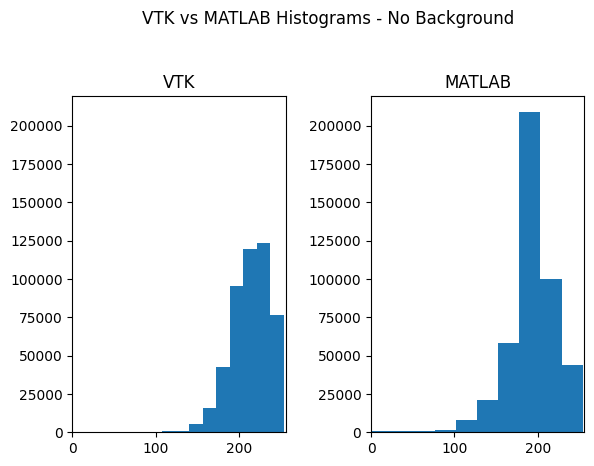

In [5]:
vtkNoWhite = np.delete(vtkNPImg.ravel(), np.where(vtkNPImg.ravel() == 255))
matlabNoWhite = np.delete(matlabNPImg.ravel(), np.where(matlabNPImg.ravel() == 255))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('VTK vs MATLAB Histograms - No Background')
ax1.hist(vtkNoWhite)
ax1.set_title('VTK')
ax1.set_xlim(0,256)
ax2.hist(matlabNoWhite)
ax2.set_title('MATLAB')
ax2.set_xlim(0,256)

ax1_ylim = ax1.get_ylim()
ax2_ylim = ax2.get_ylim()
if ax1_ylim[1] > ax2_ylim[1]:
    ax1.set_ylim(ax1_ylim)
    ax2.set_ylim(ax1_ylim)
else:
    ax1.set_ylim(ax2_ylim)
    ax2.set_ylim(ax2_ylim)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.4)
plt.savefig("./Data/vtkVsMatlabHistNoBg.png")